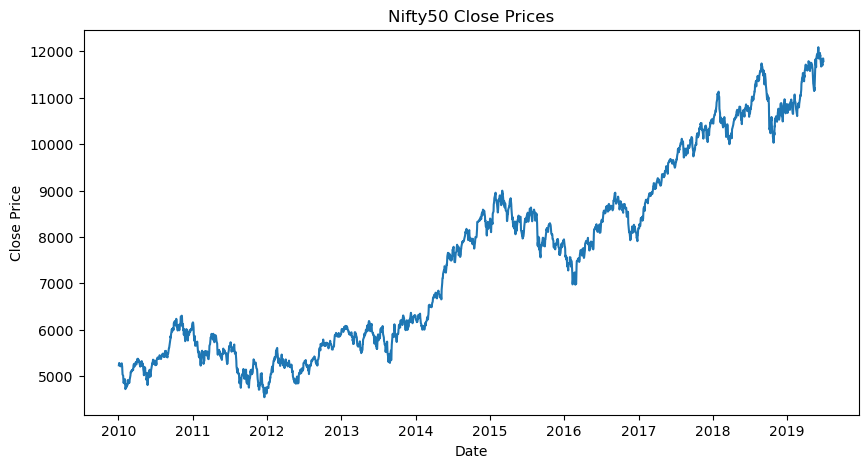

Total data points: 2321
Training data points: 1856
Test data points: 465


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\Gajendra\Documents\RL\nifty50_2010_2019.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Select the 'Close' price for the analysis
close_prices = data['Close']

# Plot the data to visualize
plt.figure(figsize=(10, 5))
plt.plot(close_prices)
plt.title('Nifty50 Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

# Split into training and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Print data info
print(f'Total data points: {len(scaled_data)}')
print(f'Training data points: {len(train_data)}')
print(f'Test data points: {len(test_data)}')


ARIMA

In [9]:
!pip install statsmodels

LSTM

C:\Users\Gajendra\anaconda3\envs\DeepTF\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0346
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0025
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0018
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0014
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0015
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0016
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0013
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0013
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0012
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0011
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0011
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 9.7055e-04
Epoch 13/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9.0296e-04
Epoch 14/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 9.2645e-04
Epoch 15/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss:

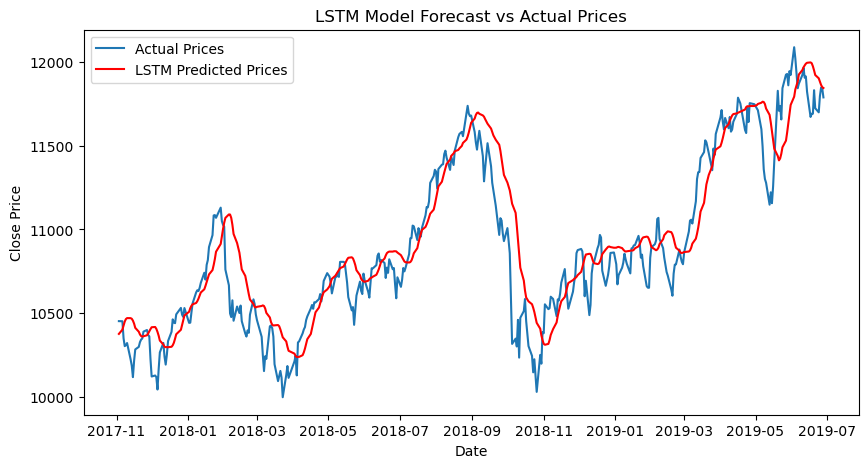

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1)

# Predicting the stock prices using the LSTM model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Evaluate the model
mse_lstm = mean_squared_error(close_prices[train_size + time_step + 1:], predicted_prices)
print(f'LSTM Model MSE: {mse_lstm}')

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(close_prices[train_size + time_step + 1:], label='Actual Prices')
plt.plot(pd.Series(predicted_prices.flatten(), index=close_prices[train_size + time_step + 1:].index), color='red', label='LSTM Predicted Prices')
plt.title('LSTM Model Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
